In [10]:
import pandas             as pd
import numpy              as np
import pylab              as pl
from   scipy.spatial      import Delaunay
from   scipy.spatial      import KDTree
from   astropy.table      import Table

##  Example with Random Point

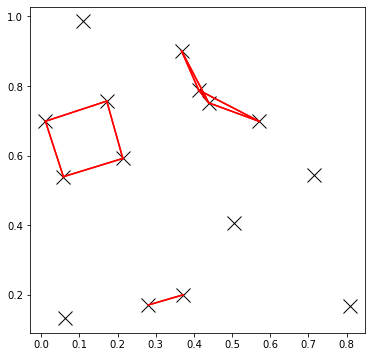

In [99]:
import matplotlib.pyplot as plt

import numpy as np

from scipy.spatial import KDTree

rng = np.random.default_rng()

points1 = rng.random((15, 2))

plt.figure(figsize=(6, 6))

plt.plot(points1[:, 0], points1[:, 1], "xk", markersize=14)

kd_tree1 = KDTree(points1)

indexes = kd_tree1.query_ball_tree(kd_tree1, r=0.2)

for i in range(len(indexes)):
    for j in indexes[i]:
        plt.plot([points1[i, 0], points1[j, 0]],[points1[i, 1], points1[j, 1]], "-r")
plt.show()

In [134]:
kdtree_02 = np.array([ np.array([i, len(i)], dtype=object)  for i in indexes])

In [135]:
ii_0_simplex = np.where(kdtree_02[:,1] == 1)[0]
len(ii_0_simplex)
ii_1_simplex = np.where(kdtree_02[:,1] == 2)[0]
len(ii_1_simplex)

2

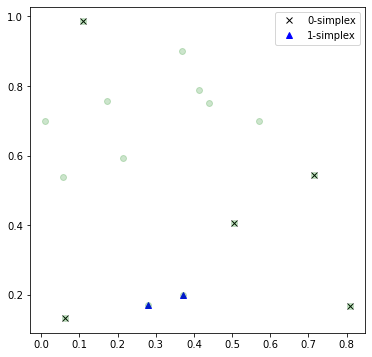

In [138]:
plt.figure(figsize=(6, 6))
pl.plot(points1[ii_0_simplex][:,0], points1[ii_0_simplex][:,1], 'xk', label='0-simplex')
pl.plot(points1[ii_1_simplex][:,0], points1[ii_1_simplex][:,1], '^b', label='1-simplex')
pl.plot(points1[:,0], points1[:,1], 'og', alpha=0.2)
pl.legend()
pl.show()

## On the GAMA G15

In [2]:
data = Table.read('./data/gama_gold_ddp.fits')

In [3]:
rot_xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
df_pos = data[rot_xyz_labels].to_pandas()
rot_xyz = np.array(df_pos)

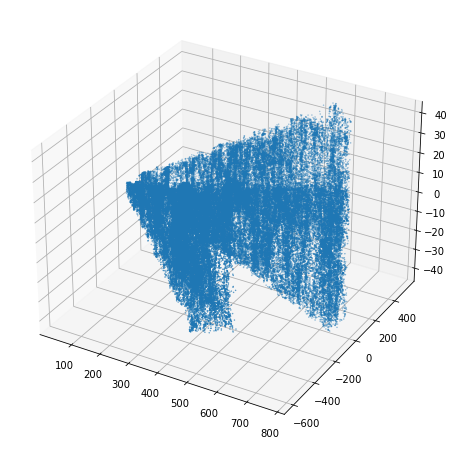

In [4]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz[:,0], rot_xyz[:,1], rot_xyz[:,2], s=0.2)

In [5]:
G15 = np.array(data['FIELD'], dtype=str)
ii_G15 = G15 == 'G15'
ii_G15

array([False, False,  True, ..., False,  True, False])

In [6]:
DDP = np.array(data['DDP'])
ii_DDP1 = DDP[:,0] == 1 
df_pos_DDP1 = df_pos[ii_DDP1 & ii_G15]
rot_xyz_ddp1 = rot_xyz[ii_DDP1 & ii_G15]

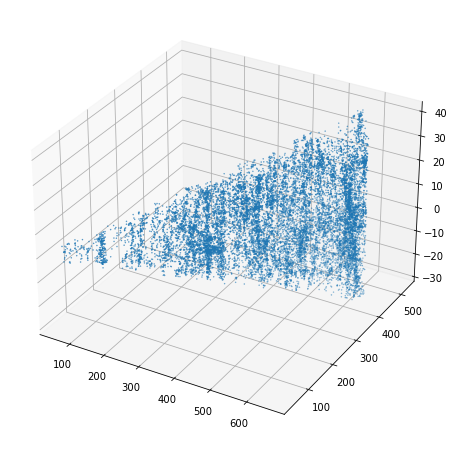

In [7]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz_ddp1[:,0], rot_xyz_ddp1[:,1], rot_xyz_ddp1[:,2], s=0.2)

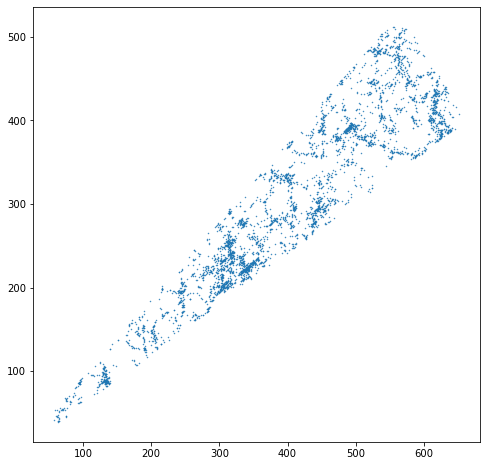

In [8]:
fig = pl.figure(figsize=(8,8), rasterized=True)
is_slice = (rot_xyz_ddp1[:,2]>-5) & (rot_xyz_ddp1[:,2]<5)
pl.scatter(rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice], s=0.2)

## For a Slice

In [140]:
test_pos = np.c_[rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice]]
# test_pos = np.c_[rot_xyz_ddp1[:,0], rot_xyz_ddp1[:,1], rot_xyz_ddp1[:,2]]
test_pos

array([[405.86038402, 283.90862623],
       [321.42086185, 255.41947976],
       [451.50317643, 298.94819368],
       ...,
       [451.38104426, 404.75828724],
       [276.45075662, 210.85112595],
       [395.10984945, 333.19191631]])

In [141]:
kd_tree_all  = KDTree(test_pos)
kd_tree_all

In [142]:
indexes_dat = kd_tree_all.query_ball_tree(kd_tree_all, r=8.)

In [143]:
kdtree_8 = np.array([ np.array([i, len(i)], dtype=object)  for i in indexes_dat])

In [144]:
ii_0_simplex = np.where(kdtree_8[:,1] == 1)[0]
len(ii_0_simplex)

13

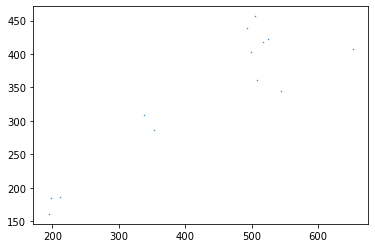

In [145]:
pl.scatter(test_pos[ii_0_simplex][:,0], test_pos[ii_0_simplex][:,1], s=0.2)
pl.show()

In [146]:
ii_1_simplex = np.where(kdtree_8[:,1] == 2)[0]
len(ii_1_simplex)

39

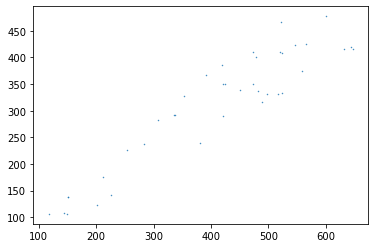

In [147]:
pl.scatter(test_pos[ii_1_simplex][:,0], test_pos[ii_1_simplex][:,1], s=0.2)
pl.show()

In [148]:
ii_2_simplex = np.where(kdtree_8[:,1] == 3)[0]
len(ii_2_simplex)

45

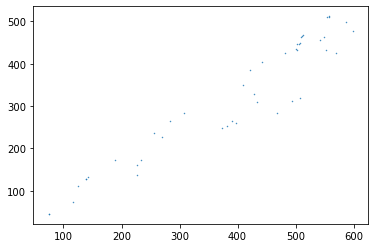

In [149]:
pl.scatter(test_pos[ii_2_simplex][:,0], test_pos[ii_2_simplex][:,1], s=0.2)
pl.show()

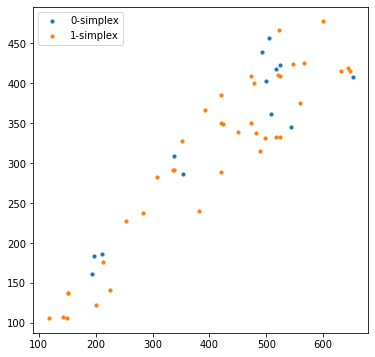

In [150]:
fig,_ = pl.subplots(figsize=(6,6))
# ax = pl.axes(projection='3d')
pl.scatter(test_pos[ii_0_simplex][:,0], test_pos[ii_0_simplex][:,1], s=10, label='0-simplex')
pl.scatter(test_pos[ii_1_simplex][:,0], test_pos[ii_1_simplex][:,1], s=10, label='1-simplex')
# pl.scatter(test_pos[ii_2_simplex][:,0], test_pos[ii_2_simplex][:,1], s=2, label='2-simplex')
pl.legend()
pl.show()

In [151]:
np.unique(kdtree_8[:,1])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
       104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 140], dtype=object)